In [7]:
from IPython.display import Image
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
import os

# KMean Cluster Analysis of ACC and RPMS Data

## 1. Data Preprocessing

In [8]:
proc_list = []
car_num = '2612'
dirt = '../data/prodata/'
proc_file = os.listdir(dirt+car_num)
for f in proc_file[:]:
    dir = dirt + car_num + '/' + f
    proc_list.append(pd.read_csv(dir))

In [33]:
radf = proc_list[0][['RPMS','ACC']]
radf['RPMS'] = radf['RPMS'] / 100   # RPM 변화량 100단위 ACC 1단위임으로 100을 나눠서 값을 맞춰준다 
#radf['RPMS'] = radf['RPMS'].abs()   # 절대값 부여
#radf['ACC'] = radf['ACC'].abs()   # 절대값 부여
ranp = radf.to_numpy()
ranp

C:\Users\user\AppData\Local\Temp\ipykernel_2672\1735493341.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  radf['RPMS'] = radf['RPMS'] / 100   # RPM 변화량 100단위 ACC 1단위임으로 100을 나눠서 값을 맞춰준다


array([[0.   , 0.   ],
       [2.04 , 0.   ],
       [0.855, 0.   ],
       ...,
       [0.   , 0.   ],
       [0.   , 0.   ],
       [0.   , 0.   ]])

## 2. KMean Analysis

In [34]:
# TODO: KMeans class를 사용하되, init='random' argument를 사용하세요.
km = KMeans(n_clusters=2,
            init='k-means++',
            n_init=1,
            max_iter=300,
            tol=1e-04,
            random_state=0)

y_km = km.fit_predict(ranp)

In [35]:
print('y_km : ',)
y_km.all()

y_km : 


False

## 3. Drawing Clustering Graph

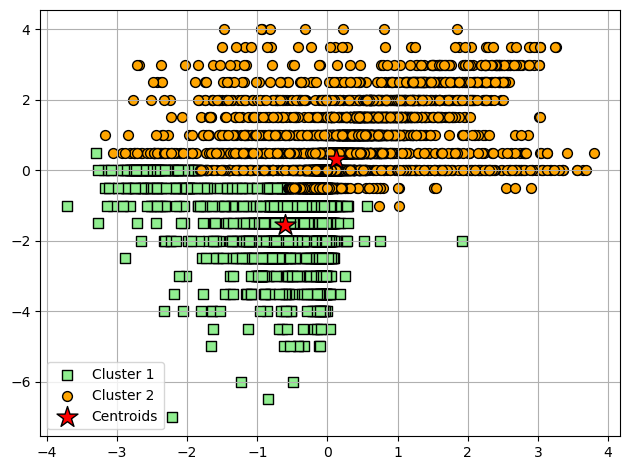

In [36]:
plt.scatter(ranp[y_km == 0, 0],
            ranp[y_km == 0, 1],
            s=50, c='lightgreen',
            marker='s', edgecolor='black',
            label='Cluster 1')
plt.scatter(ranp[y_km == 1, 0],
            ranp[y_km == 1, 1],
            s=50, c='orange',
            marker='o', edgecolor='black',
            label='Cluster 2')
plt.scatter(km.cluster_centers_[:, 0],
            km.cluster_centers_[:, 1],
            s=250, marker='*',
            c='red', edgecolor='black',
            label='Centroids')
plt.legend(scatterpoints=1)
plt.grid()
plt.tight_layout()
# plt.savefig('images/11_02.png', dpi=300)
plt.show()

<br>